In [4]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
import pandas as pd

california_housing = fetch_california_housing(as_frame=True)
dataset=california_housing.frame

X=dataset[["MedInc","HouseAge","AveRooms","AveBedrms","Population","AveOccup"]]
y=dataset["MedHouseVal"]

# Dividing the model between train and test

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)

In [8]:
import tensorflow as tf
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense
from sklearn.metrics import accuracy_score

model=Sequential()
model.add(Dense(units=10,input_dim=len(X_train.columns)))
model.add(Dense(units=10))
model.add(Dense(units=1))

model.compile(optimizer=tf.keras.optimizers.Adam(0.05),loss="mean_squared_error")
        
print("Entrenando modelo...")
training=model.fit(X_train,y_train,epochs=1000,verbose=False)
print("Modelo entrenado!")

Entrenando modelo...
Modelo entrenado!


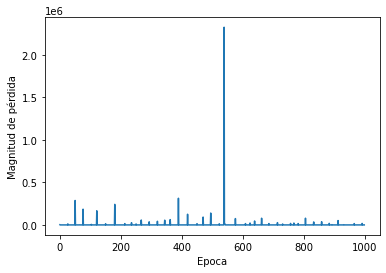

In [9]:
import matplotlib.pyplot as plt
plt.xlabel("Epoca")
plt.ylabel("Magnitud de pérdida")
plt.plot(training.history["loss"])

In [10]:
print(model.evaluate(X_test,y_test))

194/194 [==============================] - 0s 482us/step - loss: 0.8173
0.8173176646232605


In [49]:
comparison=y_test.to_frame()
predicted_values=model.predict(X_test)
predicted_values=predicted_values.tolist()
predicted_values_numbers=[]

for i in predicted_values:
    predicted_values_numbers.append(i[0])

comparison["Predicted"]=predicted_values_numbers
comparison

comparison["Effectiveness"]=round(1-((abs(comparison["Predicted"]-comparison["MedHouseVal"])/comparison["Predicted"])),2)
round(comparison["Effectiveness"].mean(),2)


194/194 [==============================] - 0s 446us/step


0.67